# General Remarks
- **Collaboration**: you can work in teams of up to 3 people. 
- **Honor code**: you can consult any papers, references, or available implementations for ideas and code, but you must clearly cite your sources in your code and in your report. The information leakage between groups is not allowed: originality of the work will be taken into account in the project assessment. 

# Convolutional Neural Network for Medical Imaging Analysis - Abnormality detection in mammography

The objective is to perform abnormality classification in mammography using Convolutional Neural Networks

### Original Dataset

The dataset we will focus on is **CBIS DDSM: Curated Breast Imaging Subset of Digital Database for Screening Mammography**.

The original data, along with a detailed description of the collection and the policies about usage and citation, can be found here: https://wiki.cancerimagingarchive.net/display/Public/CBIS-DDSM

This collection is freely available to browse, download, and use for commercial, scientific and educational purposes as outlined in the [Creative Commons Attribution 3.0 Unported License](https://creativecommons.org/licenses/by/3.0/).


A description of the dataset is provided in:
> Lee, Rebecca Sawyer, et al. "A curated mammography data set for use in computer-aided detection and diagnosis research." Scientific data 4 (2017): 170177. URL:
https://www.nature.com/articles/sdata2017177



The original images are in DICOM format, the standard format for the communication and management of medical imaging information and related data.

### Description of abnormalities and Classification Tasks
The CBIS-DDSM dataset represents a collection of images from two classes of abnormalities. Indeed, it enables a task of **abnormality classification**, which aims at distinguishing the following classes:
- Mass
- Calcification


Furthermore, several csv files are hosted [here](https://wiki.cancerimagingarchive.net/display/Public/CBIS-DDSM#510bc7863f3042f59a27301f1f4b6bef) and provide a detailed description of each image, according to the following fields:

`patient_id, breast density, left or right breast, image view, abnormality id, abnormality type, calc type, calc distribution, assessment, pathology, subtlety, image file path, cropped image file path, ROI mask file path`
 
Such description enables another fine-grained task: **abnormality diagnosis classification**. It aims at distinguishing the following classes:
- Mass, Benign (with or without callback)
- Mass, Malignant
- Calcification, Benign
- Calcification, Malignant


In the following you can find a sample image from the original dataset:



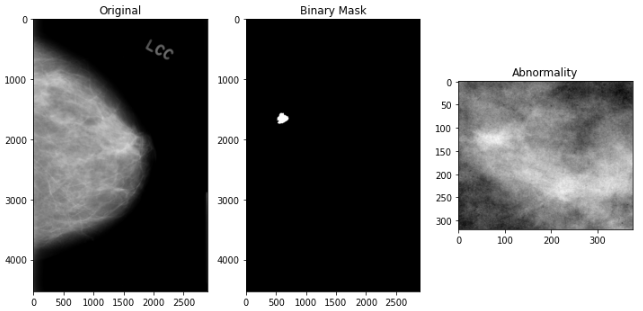



Please notice that:
- Full images have a high resolution, e.g. 3000x4000
- Full images and patches are grayscale images with a depth of 16bit

## Dataset as it is provided for the final project

Dealing with original dataset is critical since full images are high resolution and the DICOM format is not natively supported in tf.keras.

**Indeed, you are provided with numpy arrays containing images and labels from training and test sets.**

The steps performed on each original image are described below:

- the **abnormality patch** has been extracted from the original image according to the binary mask;
- a patch of healthy tissue (**baseline patch**) adjacent to the abnormality patch has been extracted from the original image (left, right, top or bottom - no overlap). Both **abnormality patch** and **baseline patch** have been added to the images tensor; in other words, an abnormality patch has been ignored if a related baseline patch could not be extracted.
- both abnormality patch and baseline patch have been resized to shape (150x150)  using OpenCV resize function: `cv2.resize(img, dsize=(shape, shape), interpolation=cv2.INTER_NEAREST)`
- class labels have been assigned to the patches according to the following mapping:
  - 0: Baseline patch
  - 1: Mass, benign
  - 2: Mass, malignant
  - 3: Calcification, benign
  - 4: Calcification, malignant 
- images of baseline patch and abnormality patch, and their related labels, have been added to distinct numpy arrays for images and labels. 
  - `train_tensor.npy`: images tensor for training
  - `train_labels.npy`: labels tensor for training
  - `public_test_tensor.npy`: images tensor for test
  - `public_test_labels.npy`: images tensor for test
- The images tensor of a private test set is also provided. The relative labels tensor is not published within the project files.
  - `private_test_tensor.npy`
  - `private_test_labels.npy`


## Dataset Structure

- Training set:
  - images tensor shape (5352, 150, 150)
  - labels tensor shape (5352,)

- Public Test set:
  - images tensor shape (672, 150, 150)
  - labels tensor shape (672,)

### Classes distribution of images

- Train

| - | benign | malignant | total 
| --- | --- | --- | --- 
| Train Masses | 620    | 598       | 1218 
| Train Calcification | 948    | 510       | 1458 
| **Total** | 1568 | 1108 | 2676 


- Test

| - | benign | malignant | total 
| --- | --- | --- | --- 
| Global Test Masses  | 214    | 144       | 358  
| Global Test Calcification | 192    | 122       | 314  
| **Total** | 406 | 266 | 672 

### Baseline patches number and position

| - | right | left | top | bottom | total baselines
| --- | --- | --- | --- | --- | --- 
| Baseline for train Masses | 836   | 240  | 89  | 53     | 1218
| Baseline for train Calcification | 894   | 246  | 163 | 155    | 1458 
| Baseline for global Test Masses  | 241   | 78   | 27  | 12     | 358
| Baseline for global Test Calcification | 180   | 50   | 42  | 42     | 314  


In light of the procedure described above, particular attention should be paid to the structure of the input tensors:
- odd indices [```2i + 1  for i in range(0,len(tensor)/2)```] will refer to **abnormality patches**
- previous even indices [```2i for i in range(0,len(tensor)/2)```] will refer to  respective **baseline patches**


**You will be able to load the arrays using `numpy load` function.**

```python
def load_training():
  images = np.load(os.path.join(out_path,'train_tensor.npy'))
  labels = np.load(os.path.join(out_path,'train_labels.npy'))
  return images,labels

images, labels= load_training()
print(labels[:10])
>>> array([0, 2, 0, 2, 0, 1, 0, 1, 0, 1])
```

The first item is the baseline patch (label 0) that is adjacent to the patch described by the second element of the array, i.e. the first abnormality patch (malignant mass, label 2), and so on.


## Project Aims and Requirements

### TASK 1
1.1) Analysis of the most relevant works and state-of-art techniques related with the case study, possibly referring to the CBIS-DDSM dataset. Some inspiration to solve subsequent tasks may come from existing research works. 

### TASK 2: [**Scratch_CNN.ipynb**], one or more ipynb files
2.1) Development of a classification model for discriminating between **2 classes: masses and calcification**. Design and development of an ad-hoc CNN architecture (training from scratch). 

2.2) Development of a classification model for discriminating between **2 classes: benign and malignant** diagnosis. Design and development of an ad-hoc CNN architecture (training from scratch). 

### TASK 3: [**PreTrained_CNN.ipynb**], one or more ipynb files

3.1) Development of a classification model for discriminating between **2 classes: masses and calcification**. Usage of at least one pre-trained state-of-the-art architecture.

3.2) Development of a classification model for discriminating between **2 classes: benign and malignant**. Usage of at least one pre-trained state-of-the-art architecture. 

### TASK 4:  [**BaselineCNN.ipynb**] one or more ipynb files
4.1) Development of a classification model for discriminating the **abnormality type (mass v calcification)** or the **diagnosis (benign v malignant)**, using **pre-trained or from-scratch CNN**. The model must exploit the **baseline patches** (e.g. feeding model with both abnormality and baseline patches, siamese architecture, ...)

### TASK 5:  [**Ensemble.ipynb**]
5.1) Development of a composite classifier (Ensemble of Neural Networks) to boost classification performance.  The notebook will load *different* already trained models (or their prediction) and will compute the output of the composite classifier. 


## General Goals

**The general goals of the final project are the following**:
- Solve classification problems with pretrained and from-scratch CNNs.
- Discuss classification results for the different classification problems.
- Evaluate the influence of providing the model with the baseline patches, other than just the abnormality patches, for the classification of abnormality type or diagnosis.
- Evaluate the consequences of resorting to ensemble solutions, highlighting the accuracy gap between the base classifiers and the composite classifier. Report in a compact manner (and adequately discuss) the performance of the composite classifier w.r.t. those of its base classifiers.
- Demonstrate mastery of deep learning basic concepts (model selection, evaluation of underfitting / overfitting in this case study, application of regularization techniques)

Furthermore, it will be particularly appreciated:
  - Creativity
  - Usage of algorithms, techniques and architectures that were not presented during the course
  - Adoption of techniques (e.g. architectures, preprocessing techniques, procedures) inspired by the literature. The inspiring works must be properly referenced.
  - High performance models: do not fit your model (params or hyperparams) on the provided *public test set*: your notebook will be tested replacing the *public test set* with a *private test set*, (as often it happens in Kaggle competitions)



# Project submission

Unless otherwise stated:
- The project must be submitted by sharing the Drive folder ("Visualization" mode) with the following accounts 
  - beatrice.lazzerini@unipi.it
  - alessandro.renda@unifi.it
- The project must be submitted few days (typically 3-5) before the date of the oral exam.
- A part of the oral examination will be dedicated to the discussion of the project.

**The shared folder must be organized as follows**:

```python
|__Surname[_Surname2[_Surname3]]
    |____ Scratch_CNN.ipynb # one or more notebook
    |____ Pretrained_CNN.ipynb # one or more notebook
    |____ BaselineCNN.ipynb # one or more notebook
    |____ Ensemble.ipynb # one or more notebook
    |____ ... (other .ipynb, if needed)
    |____ Submission.csv
    |____ Report.pdf
    |____ models
          |______ store your models checkpoints here
```


In other words, you must include

- all the notebook files (ipynb) with tasks solutions, adequately described and commented. The cells output should reflect the results reported in the report.
- Network checkpoint models, stored in a dedicated folder. 
- **Report.pdf**. The report must include:
  - A description of the state-of-the-art/related works, with particular focus on the works/implementations that inspired your solutions.
  - A detailed description of the proposed solutions, highlighting the motivation behind the performed choices, with commented figures and plots.
    - E.g.: 
        - *simple model -> accuracy curves obtained on a validation set allows to observe underfitting*
        - *more complex model -> accuracy curves obtained on a validation set allows to observe overfitting*
        - *application of these regularization techniques: ...*
        - *performed these hyperparameters search: ...*
        - *hyperparameters chosen according to ...*
    - details about how you produce your **contest** submission
        
- File **Submission.csv** with the predictions of your best classifier (or composite classifier) evaluated on the **private_test_images** for the problem of **diagnosis classification (benign v malignant**). The submission guidelines can be found in the Notebook **Contest.ipynb**. The file must be comply with the following format, i.e. one label per line (0 for benign, 1 for malignant):


 > 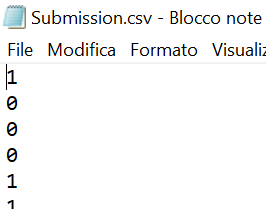

 
 
 

   
  

## References
- Dataset:
  -  Rebecca Sawyer Lee, Francisco Gimenez, Assaf Hoogi , Daniel Rubin  (2016). Curated Breast Imaging Subset of DDSM. The Cancer Imaging Archive. http://dx.doi.org/10.7937/K9/TCIA.2016.7O02S9CY

  - Rebecca Sawyer Lee, Francisco Gimenez, Assaf Hoogi, Kanae Kawai Miyake, Mia Gorovoy & Daniel L. Rubin. A curated mammography data set for use in computer-aided detection and diagnosis research. Scientific Data volume 4, Article number: 170177 (2017) (link)

  - Clark K, Vendt B, Smith K, Freymann J, Kirby J, Koppel P, Moore S, Phillips S, Maffitt D, Pringle M, Tarbox L, Prior F. The Cancer Imaging Archive (TCIA): Maintaining and Operating a Public Information Repository, Journal of Digital Imaging, Volume 26, Number 6, December, 2013, pp 1045-1057. (paper)
